In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression,Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# Read in full data for movie analysis
df = pd.read_csv('data_for_analysis.csv',index_col=[0])

# Display full column width (for the links) and all the columns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

df.sample(50)

,Tomatoes URL,Title,Tomatometer,Year,N_Tomatometer,tconst,isAdult,runtimeMinutes,Average_Audience_Rating,Number_Audience_Votes,BOM url,Domestic_Gross,International_Gross,Worldwide_Gross,Domestic_Distributor,Domestic_Opening,MPAA_Rating,Genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,G,NC-17,PG,PG-13,R,Unrated
2334,https://www.rottentomatoes.com/m/endless_love,Endless Love,26,1981,19,tt0082329,0,116.0,4.9,8117,https://www.boxofficemojo.com/title/tt0082329/,31184024.0,1308650.0,32492674.0,Universal PicturesSee full company information\n\n,4163623.0,Unrated,Drama\n \n Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3658,https://www.rottentomatoes.com/m/daniel_and_ana,Daniel and Ana,56,2009,9,tt1392888,0,90.0,6.1,1646,https://www.boxofficemojo.com/title/tt1392888/,2372.0,NaN,2372.0,Strand ReleasingSee full company information\n\n,1400.0,Unrated,Drama\n \n Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
108,https://www.rottentomatoes.com/m/donnys_bar_mitzvah,Donny's Bar Mitzvah,43,2021,7,tt9217296,0,79.0,7.3,3006,https://www.boxofficemojo.com/title/tt9217296/,NaN,NaN,NaN,NaN,NaN,Unrated,Comedy\n \n Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4371,https://www.rottentomatoes.com/m/doomsday,Doomsday,51,2008,75,tt0483607,0,113.0,5.9,75691,https://www.boxofficemojo.com/title/tt0483607/,11008770.0,11463861.0,22472631.0,Rogue PicturesSee full company information\n\n,4926565.0,R,Action\n \n Sci-Fi\n \n Thriller,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1364,https://www.rottentomatoes.com/m/arsenal_2017,Arsenal,3,2017,30,tt5580536,0,97.0,4.0,4374,https://www.boxofficemojo.com/title/tt5580536/,NaN,41037.0,41037.0,NaN,NaN,R,Action\n \n Crime\n \n Thriller,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2794,https://www.rottentomatoes.com/m/last_stand_2013,The Last Stand,61,2013,167,tt1549920,0,107.0,6.3,136815,https://www.boxofficemojo.com/title/tt1549920/,12050299.0,36280458.0,48330757.0,LionsgateSee full company information\n\n,6281433.0,R,Action\n \n Thriller,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4398,https://www.rottentomatoes.com/m/1174278-definitely_maybe,"Definitely, Maybe",70,2008,148,tt0832266,0,112.0,7.1,161743,https://www.boxofficemojo.com/title/tt0832266/,32241649.0,23748650.0,55990299.0,Universal PicturesSee full company information\n\n,9764270.0,PG-13,Comedy\n \n Drama\n \n Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4773,https://www.rottentomatoes.com/m/10_items_or_less,10 Items or Less,63,2006,60,tt0499603,0,82.0,6.6,15003,https://www.boxofficemojo.com/title/tt0499603/,83291.0,1315931.0,1399222.0,THINKFilmSee full company information\n\n,35929.0,R,Comedy\n \n Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1821,https://www.rottentomatoes.com/m/before_we_go,Before We Go,27,2014,30,tt4453750,0,84.0,7.2,33,https://www.boxofficemojo.com/title/tt4453750/,NaN,NaN,NaN,NaN,NaN,Unrated,Documentary\n \n Drama\n \n News,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5584,https://www.rottentomatoes.com/m/silver_city,Silver City,48,2004,128,tt0376890,0,128.0,6.0,3991,https://www.boxofficemojo.com/title/tt0376890/,1020656.0,363739.0,1384395.0,Newmarket FilmsSee full company information\n\n,337484.0,R,Comedy\n \n Drama\n \n Mystery\n \n Thriller,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7989 entries, 0 to 7988
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tomatoes URL             7989 non-null   object 
 1   Title                    7989 non-null   object 
 2   Tomatometer              7989 non-null   int64  
 3   Year                     7989 non-null   int64  
 4   N_Tomatometer            7989 non-null   int64  
 5   tconst                   7989 non-null   object 
 6   isAdult                  7989 non-null   int64  
 7   runtimeMinutes           7965 non-null   float64
 8   Average_Audience_Rating  7989 non-null   float64
 9   Number_Audience_Votes    7989 non-null   int64  
 10  BOM url                  7989 non-null   object 
 11  Domestic_Gross           5362 non-null   float64
 12  International_Gross      4294 non-null   float64
 13  Worldwide_Gross          6315 non-null   float64
 14  Domestic_Distributor    

In [4]:
# Create category to define if movie has one of the top 5 grossing genres
df['Top_5_Genres'] = (df['Action'] + df['Adventure'] + df['Drama'] + df['Comedy'] + df['Thriller'])/(df['Action'] + df['Adventure'] + df['Drama'] + df['Comedy'] + df['Thriller'])
df['Top_5_Genres'] = df['Top_5_Genres'].fillna(0)
df.sample(10)

,Tomatoes URL,Title,Tomatometer,Year,N_Tomatometer,tconst,isAdult,runtimeMinutes,Average_Audience_Rating,Number_Audience_Votes,BOM url,Domestic_Gross,International_Gross,Worldwide_Gross,Domestic_Distributor,Domestic_Opening,MPAA_Rating,Genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,G,NC-17,PG,PG-13,R,Unrated,Top_5_Genres
1773,https://www.rottentomatoes.com/m/heist_2015,Heist,29,2015,28,tt3276924,0,93.0,6.1,29555,https://www.boxofficemojo.com/title/tt3276924/,50136.0,3726910.0,3777046.0,Lionsgate PremiereSee full company information\n\n,28688.0,R,Action\n \n Crime\n \n Drama\n \n Thriller,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0
2008,https://www.rottentomatoes.com/m/accidental_love,Accidental Love,9,2015,35,tt1137470,0,100.0,4.1,8275,https://www.boxofficemojo.com/title/tt1137470/,NaN,24487.0,24487.0,NaN,NaN,PG-13,Comedy\n \n Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0
7053,https://www.rottentomatoes.com/m/mean_season,The Mean Season,60,1985,20,tt0089572,0,103.0,6.1,4012,https://www.boxofficemojo.com/title/tt0089572/,4349446.0,NaN,4349446.0,Orion PicturesSee full company information\n\n,1560591.0,Unrated,Crime\n \n Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1.0
2483,https://www.rottentomatoes.com/m/the_last_days_on_mars,The Last Days on Mars,18,2013,62,tt1709143,0,98.0,5.5,36531,https://www.boxofficemojo.com/title/tt1709143/,24084.0,163107.0,187191.0,Magnolia PicturesSee full company information\n\n,4608.0,R,Adventure\n \n Horror\n \n Sci-Fi\n \n Thriller,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1.0
1167,https://www.rottentomatoes.com/m/the_secret_scripture,The Secret Scripture,35,2016,40,tt3344694,0,108.0,6.7,7190,https://www.boxofficemojo.com/title/tt3344694/,NaN,694981.0,694981.0,Vertical EntertainmentSee full company information\n\n,NaN,PG-13,Drama\n \n Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0
4851,https://www.rottentomatoes.com/m/grudge_2,The Grudge 2,12,2006,77,tt0433386,0,102.0,5.1,48709,https://www.boxofficemojo.com/title/tt0433386/,39143839.0,31567336.0,70711175.0,Sony Pictures Entertainment (SPE)See full company information\n\n,20825300.0,PG-13,Horror\n \n Thriller,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1.0
6123,https://www.rottentomatoes.com/m/shanghai_surprise,Shanghai Surprise,13,1986,8,tt0091934,0,97.0,3.2,5351,https://www.boxofficemojo.com/title/tt0091934/,2315683.0,NaN,2315683.0,Metro-Goldwyn-Mayer (MGM)See full company information\n\n,729885.0,PG-13,Adventure\n \n Comedy\n \n Crime\n \n Drama\n \n Romance,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0
1535,https://www.rottentomatoes.com/m/the_minds_eye_2016,The Mind's Eye,62,2015,26,tt4567486,0,87.0,4.7,1877,https://www.boxofficemojo.com/title/tt4567486/,NaN,NaN,NaN,NaN,NaN,Unrated,Action\n \n Horror\n \n Sci-Fi,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1.0
3859,https://www.rottentomatoes.com/m/the_horseman_2008,The Horseman,60,2008,30,tt1060255,0,96.0,6.5,4976,https://www.boxofficemojo.com/title/tt1060255/,NaN,1993.0,1993.0,NaN,NaN,R,Crime\n \n Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0
6434,https://www.rottentomatoes.com/m/teenage_mutant_ninja_turtles_iii,Teenage Mutant Ninja Turtles III,22,1993,32,tt0108308,0,96.0,4.8,32349,https://www.boxofficemojo.com/title/tt0108308/,42273609.0,NaN,42273609.0,New Line CinemaSee full company information\n\n,12419597.0,PG,Action\n \n Adventure\n \n Comedy\n \n Family\n \n Fantasy\n \n Sci-Fi,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.0


In [5]:
# Create df of movies that have a worldwide gross revenue available
df2 = df[df['Worldwide_Gross'].notna()]

# Trim the database to the last 20 years
df2 = df2[(df2['Year']>=2000)&(df2['Year']<2020)]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4580 entries, 33 to 7411
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tomatoes URL             4580 non-null   object 
 1   Title                    4580 non-null   object 
 2   Tomatometer              4580 non-null   int64  
 3   Year                     4580 non-null   int64  
 4   N_Tomatometer            4580 non-null   int64  
 5   tconst                   4580 non-null   object 
 6   isAdult                  4580 non-null   int64  
 7   runtimeMinutes           4579 non-null   float64
 8   Average_Audience_Rating  4580 non-null   float64
 9   Number_Audience_Votes    4580 non-null   int64  
 10  BOM url                  4580 non-null   object 
 11  Domestic_Gross           3724 non-null   float64
 12  International_Gross      3871 non-null   float64
 13  Worldwide_Gross          4580 non-null   float64
 14  Domestic_Distributor   

## Average Worldwide Gross vs Movie Genre
- Hypothesis: movies that are in the top 5 genres do better at the box office

0.005820850792403021


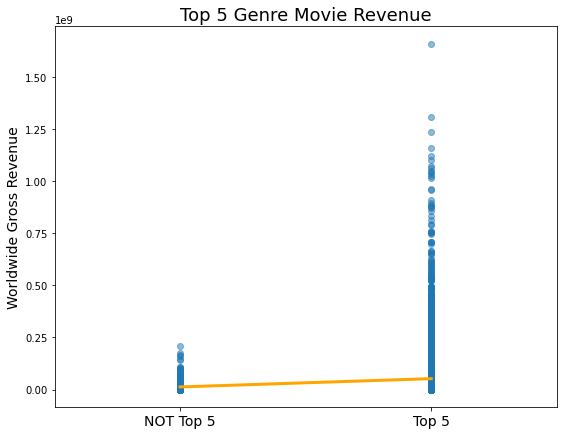

In [39]:
lr = LinearRegression()

x = df2[['Top_5_Genres']]
y = df2['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))

ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

plt.title('Top 5 Genre Movie Revenue', fontsize=18)
plt.ylabel('Worldwide Gross Revenue', fontsize=14)
plt.xlim([-0.5, 1.5])
plt.xticks(np.arange(0, 2, 1))
labels = ['NOT Top 5','Top 5']
ax.set_xticklabels(labels, fontsize=14)

print(lr.score(x, y))


plt.savefig("top_5_revenue.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)





In [7]:
lr.coef_, lr.intercept_
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')
# The average Worldwide Gross is $39 million higher for movies that are in the top 5 genres

slope: 39817265.21
y-intercept: 12382206.25


## Average Worldwide Gross vs MPAA rating / unrated
- Hypothesis: unrated movies tend to do less well in theatres, sometimes they're not even shown. Does the rating (kid friendly vs not) have an impact on its success?


0.028917651581936932


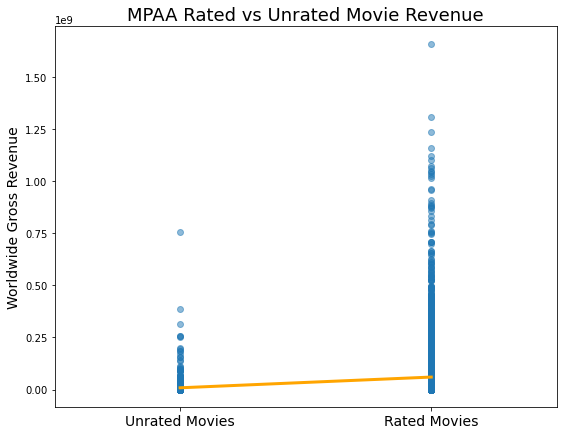

In [38]:
lr = LinearRegression()

x = -df2[['Unrated']]
y = df2['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))


ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

plt.title('MPAA Rated vs Unrated Movie Revenue', fontsize=18)
plt.ylabel('Worldwide Gross Revenue', fontsize=14)
plt.xlim([-1.5, 0.5])
plt.xticks(np.arange(-1, 0.5, 1))
labels = ['Unrated Movies','Rated Movies']
ax.set_xticklabels(labels, fontsize=14)


print(lr.score(x, y))



plt.savefig("MPAA_rating_revenue.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)



In [9]:
lr.coef_, lr.intercept_
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')
# The average Worldwide Gross is $51million higher for movies that have an MPAA rating

slope: 51560644.23
y-intercept: 59777843.73


## Average Worldwide Gross vs Audience Rating
- Tomatometer vs audience score in predicting movie success
- Hypothesis: Higher rated movies (by both critics and audience) will correlate with more success at the box office 

0.017372400634212748


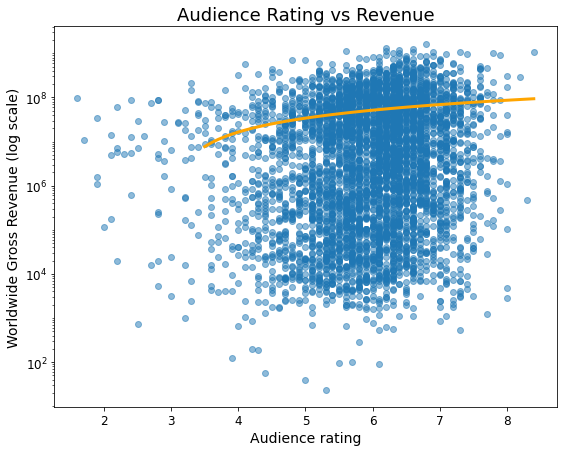

In [10]:
# AUDIENCE RATING

lr = LinearRegression()

x = df2[['Average_Audience_Rating']]
y = df2['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))


ax.scatter(x, y, alpha=.5)

_x = np.linspace(3.5, x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

ax.set_yscale('log')
y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
ax.yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.title('Audience Rating vs Revenue', fontsize=18)
plt.ylabel('Worldwide Gross Revenue (log scale)', fontsize=14)
plt.xlabel('Audience rating', fontsize=14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

print(lr.score(x, y))


plt.savefig("audience_rating.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)

In [11]:
lr.coef_, lr.intercept_
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')


slope: 17486441.96
y-intercept: -53508880.75


0.0022657499769073164


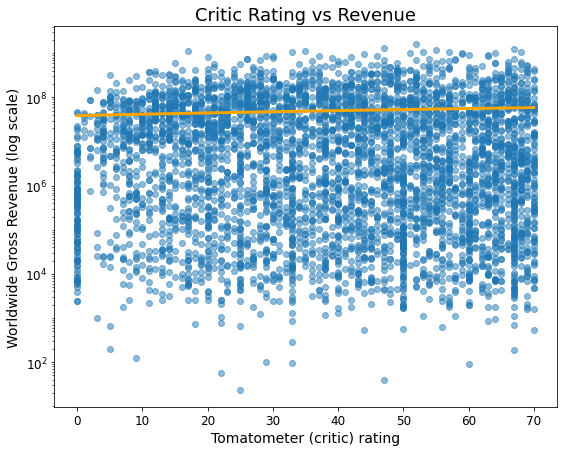

In [12]:
# CRITICS RATING

lr = LinearRegression()

x = df2[['Tomatometer']]
y = df2['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))


ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

ax.set_yscale('log')
y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
ax.yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.title('Critic Rating vs Revenue', fontsize=18)
plt.ylabel('Worldwide Gross Revenue (log scale)', fontsize=14)
plt.xlabel('Tomatometer (critic) rating', fontsize=14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

print(lr.score(x, y))

plt.savefig("critic_rating.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)


In [13]:
lr.coef_, lr.intercept_
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')


slope: 286838.63
y-intercept: 38778532.79


0.3862974236147205


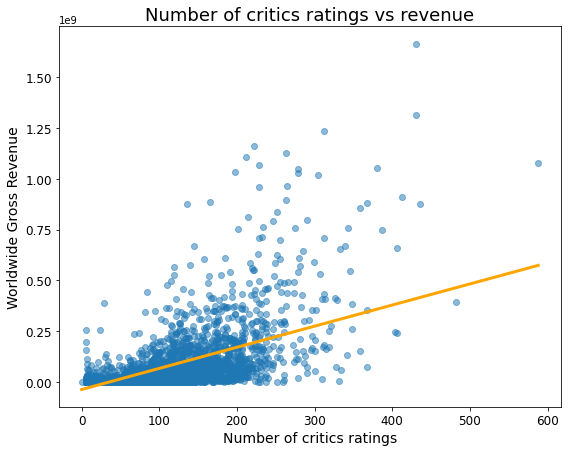

In [14]:
lr = LinearRegression()

x = df2[['N_Tomatometer']]
y = df2['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))

ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

plt.title('Number of critics ratings vs revenue', fontsize=18)
plt.ylabel('Worldwide Gross Revenue', fontsize=14)
plt.xlabel('Number of critics ratings', fontsize=14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)


plt.savefig("N_critic_rating.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)

print(lr.score(x, y))


In [15]:
lr.coef_, lr.intercept_
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')


slope: 1036550.07
y-intercept: -35496902.90


0.5572648999785235


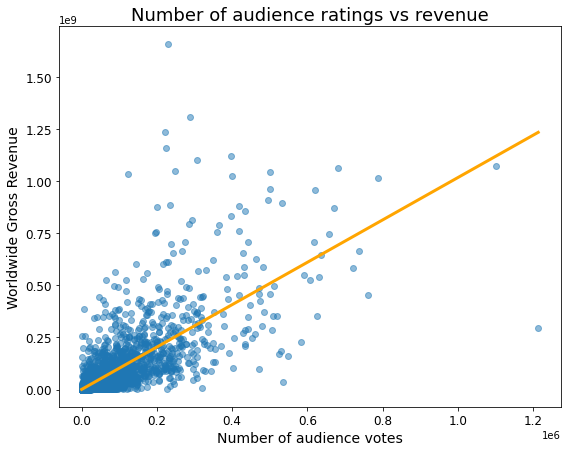

In [16]:
lr = LinearRegression()

x = df2[['Number_Audience_Votes']]
y = df2['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))


ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

plt.title('Number of audience ratings vs revenue',fontsize= 18)
plt.ylabel('Worldwide Gross Revenue',fontsize= 14)
plt.xlabel('Number of audience votes',fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)


print(lr.score(x, y))


plt.savefig("N_audience_rating.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)

In [17]:
lr.coef_, lr.intercept_
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')


slope: 1018.62
y-intercept: 527721.74


## RUN time correlation with box office success
HYPOTHESIS: there is little correlation between movie length and its success at the box office

0.07572157518341016


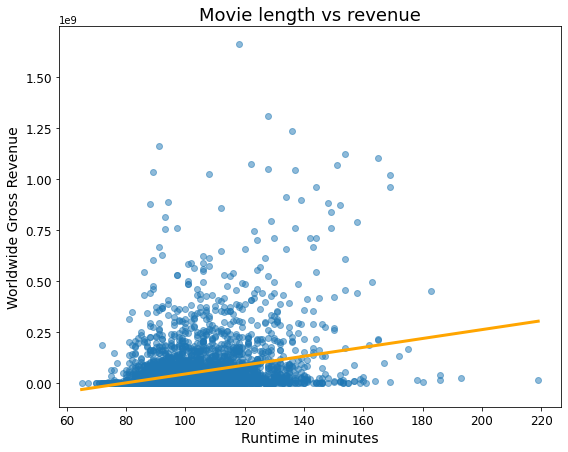

In [41]:
# quickly drop the single runtime row with NAN
df3 = df2[df2['runtimeMinutes'].notna()]

lr = LinearRegression()

x = df3[['runtimeMinutes']]
y = df3['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))

ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

plt.title('Movie length vs revenue',fontsize= 18)
plt.ylabel('Worldwide Gross Revenue',fontsize= 14)
plt.xlabel('Runtime in minutes',fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

print(lr.score(x, y))
plt.savefig("runtime_revenue.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)

0.07572157518341016


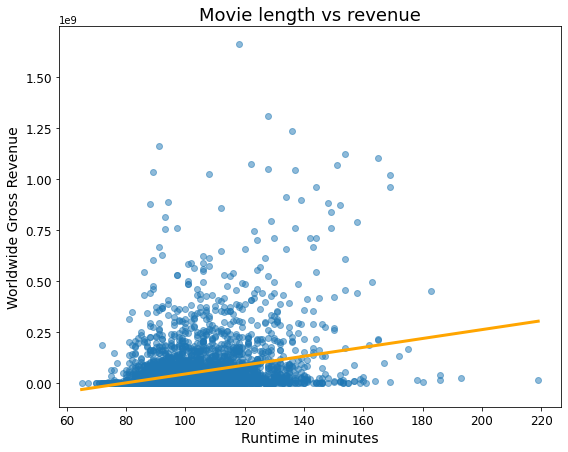

In [41]:
# quickly drop the single runtime row with NAN
df3 = df2[df2['runtimeMinutes'].notna()]

lr = LinearRegression()

x = df3[['runtimeMinutes']]
y = df3['Worldwide_Gross']

lr.fit(x, y)

lr.score(x, y) #R2

fig, ax = plt.subplots(figsize=(9, 7))

ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange',linewidth=3)

plt.title('Movie length vs revenue',fontsize= 18)
plt.ylabel('Worldwide Gross Revenue',fontsize= 14)
plt.xlabel('Runtime in minutes',fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

print
plt.savefig("runtime_revenue.jpg", dpi=199, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1)

In [19]:
lr.coef_, lr.intercept_
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')

slope: 2172733.13
y-intercept: -172713176.22


## Regularization - multiple feature linear regression analysis

In [20]:
# Dataframe for multivariable analysis
df3 = df2.loc[:,['Tomatometer', 'Year', 'N_Tomatometer', 'runtimeMinutes', 
                      'Average_Audience_Rating', 'Number_Audience_Votes', 
                      'Worldwide_Gross', 'Domestic_Opening', 'Unrated', 'Top_5_Genres']]

df3['Domestic_Opening'] = df3['Domestic_Opening'].replace(np.nan,df3['Domestic_Opening'].median())
df3['runtimeMinutes'] = df3['runtimeMinutes'].replace(np.nan,df3['runtimeMinutes'].median())

# Separate feature from target
X = df3.loc[:,['Tomatometer', 'Year', 'N_Tomatometer', 'runtimeMinutes', 
                      'Average_Audience_Rating', 'Number_Audience_Votes', 
                      'Domestic_Opening', 'Unrated', 'Top_5_Genres']]

y = df3.loc[:,['Worldwide_Gross']]

# Replace the missing values for Domestic Opening with its median value


df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4580 entries, 33 to 7411
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tomatometer              4580 non-null   int64  
 1   Year                     4580 non-null   int64  
 2   N_Tomatometer            4580 non-null   int64  
 3   runtimeMinutes           4580 non-null   float64
 4   Average_Audience_Rating  4580 non-null   float64
 5   Number_Audience_Votes    4580 non-null   int64  
 6   Worldwide_Gross          4580 non-null   float64
 7   Domestic_Opening         4580 non-null   float64
 8   Unrated                  4580 non-null   int64  
 9   Top_5_Genres             4580 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 393.6 KB


### Fit a Lasso Regression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
## .fit finds the mean and standard deviation of each variable in the training set
std = StandardScaler()
std.fit(X_train.values)
## apply the scaler to the train set
X_tr = std.transform(X_train.values)
## Apply the scaler to the test set
X_te = std.transform(X_test.values)
lasso = Lasso(alpha = 10000)
lasso.fit(X_tr, y_train)
test_r_squared = lasso.score(X_te, y_test)
print(test_r_squared)
print(list(zip(X_train.columns, lasso.coef_)))
variables_dropped_count = 5

0.8516989443546862
[('Tomatometer', 1432391.7294679226), ('Year', 5161342.2749985065), ('N_Tomatometer', 78963.7921909237), ('runtimeMinutes', 2814237.946189858), ('Average_Audience_Rating', 1664779.9632554508), ('Number_Audience_Votes', 18008409.33984902), ('Domestic_Opening', 92701463.14272103), ('Unrated', 2241409.808225663), ('Top_5_Genres', 1106687.8472407253)]


In [22]:
# Use cross validation to find the optimal lambda
alphas = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphas, cv=5)
lasso_model.fit(X_tr, y_train)
r_squared_train = lasso_model.score(X_tr, y_train)
r_squared_test = lasso_model.score(X_te, y_test)
alpha = lasso_model.alpha_

print(r_squared_train)
print(r_squared_test)
print(alpha)


0.8332528316550576
0.8517145571741178
100.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Fit an ElasticNet Regression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Use fit to find the mean and standard deviation of each variable in the training set
std = StandardScaler()
std.fit(X_train.values)

# Apply the scaler to the train set
X_tr = std.transform(X_train.values)

# Apply the scaler to the test set
X_te = std.transform(X_test.values)

enet = ElasticNet(alpha = 1, l1_ratio=.5)
enet.fit(X_tr, y_train)
test_r_squared = enet.score(X_te, y_test)

print(test_r_squared)
print(list(zip(X_train.columns, enet.coef_)))

enet = ElasticNet(alpha = 10000, l1_ratio=1)
enet.fit(X_tr, y_train)

list(zip(X_train.columns, enet.coef_))

variables_dropped_count = 5

0.7668862141806738
[('Tomatometer', -293299.27326428954), ('Year', 3542483.6379300943), ('N_Tomatometer', 13844947.69541261), ('runtimeMinutes', 3686288.199194253), ('Average_Audience_Rating', -381037.31166927726), ('Number_Audience_Votes', 26288007.541837066), ('Domestic_Opening', 51607661.30830691), ('Unrated', 945657.9293973312), ('Top_5_Genres', 330971.45738288405)]


In [24]:
# Find an optimal l1_ratio and alpha value for Elastic Net regression models 

alphas = 10 ** np.linspace(-2, 2, 200)

enet_model = ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], 
                          alphas = alphas, 
                          cv=5,
                          random_state=42)

enet_model.fit(X_tr, y_train)

r_squared_train = enet_model.score(X_tr, y_train)
r_squared_test = enet_model.score(X_te, y_test)
alpha = enet_model.alpha_
l1_ratio = enet_model.l1_ratio_

print("r_squared_train: ", round(r_squared_train, 3))
print("r_squared_test: ", round(r_squared_test, 3))
print("alpha: ", round(alpha, 3))
print("l1_ratio: ", l1_ratio)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


r_squared_train:  0.833
r_squared_test:  0.852
alpha:  100.0
l1_ratio:  1.0


## Feature Selection for Multiple Regression

In [25]:
x = df3.loc[:,['Tomatometer', 'Year', 'N_Tomatometer', 'runtimeMinutes', 
                      'Average_Audience_Rating', 'Number_Audience_Votes', 
                      'Domestic_Opening', 'Unrated', 'Top_5_Genres']]
x = sm.add_constant(x)
y = df3.loc[:,['Worldwide_Gross']]

model = sm.OLS(y,x, data = df3)

revenue_model = model.fit()
revenue_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Worldwide_Gross   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     2614.
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:30:58   Log-Likelihood:                -87494.
No. Observations:                4580   AIC:                         1.750e+05
Df Residuals:                    4570   BIC:                         1.751e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.107e+09   2.73e+08     -7.726      0.000   -2.64e+09   -1.57e+09
Tomatometer              6.874e+04   4.49e+04      1.533      0.125   -1.92e+04    1.57e+05
Year                     1.022e+06   1.35e+05      7.550      0.000    7.57e+05    1.29e+06
N_Tomatometer             495.3461   1.58e+04      0.031      0.975   -3.04e+04    3.14e+04
runtimeMinutes           2.189e+05   5.35e+04      4.094      0.000    1.14e+05    3.24e+05
Average_Audience_Rating  2.124e+06   1.04e+06      2.033      0.042    7.58e+04    4.17e+06
Number_Audience_Votes     195.9089     13.947     14.046      0.000     168.565     223.252
Domestic_Opening            6.6582      0.080     83.010      0.000       6.501       6.815
Unrated                  6.134e+06   2.06e+06      2.977      0.003    2.09e+06    1.02e+07
Top_5_Genres               5.8e+06   3.25e+06      1.784      0.074   -5.73e+05    1.22e+07
==============================================================================
Omnibus:                     3484.068   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216107.342
Skew:                           3.079   Prob(JB):                         0.00
Kurtosis:                      36.084   Cond. No.                     6.13e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Drop the variable(s) that have a p-value of greater than 0.05 (which means they are not significant) 
# and fit a regression on the remaining variables.
x = df3.drop(columns = ['Tomatometer', 'N_Tomatometer', 'Top_5_Genres','Worldwide_Gross'])
x = sm.add_constant(x)
y = df3.loc[:,['Worldwide_Gross']]
model = sm.OLS(y,x, data = df3)

revenue_model2 = model.fit()
revenue_model2.summary()

### ANALYSIS
- The p-values of the features remain below 0.05, so this new model (after dropping 'Tomatometer', 'N_Tomatometer', 'Top_5_Genres' columns) is better because it is less complex
- Dropping the 3 columns had no effect on the R-squared or adjusted R-squared values
- There still may be a problem with multicollinearity as flagged by the high condition number

## REGRESSION + FEATURE ENGINEERING

In [27]:
# Split into train, val, and test
X, X_test, y, y_test = train_test_split(df3.loc[:,['Tomatometer', 'Year', 'N_Tomatometer', 'runtimeMinutes', 
                      'Average_Audience_Rating', 'Number_Audience_Votes', 
                      'Domestic_Opening', 'Unrated', 'Top_5_Genres']], 
                                        df3.loc[:,['Worldwide_Gross']], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [28]:
# Fit a simple linear regression on training set
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.8438165311007608

In [29]:
# score on the validation set
lr.score(X_val,y_val)

0.8195373221561731

In [30]:
# Validation score is lower than training score, so there's some overfitting. 
# Try polynomial regression to see if it can do better.

In [31]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.8738430594911547

In [42]:
# Score on validation set
lr_poly.score(X_val_poly, y_val) 

0.7872743821202712